# CPS 840 / CP 8318
# Assignment 1 - Tolaz Hewa - 500590503
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

BIAS: 152.92683329145805
WEIGHTS: [933.8209727340678]
Mean Squared Error: 2553.338786267099
Variance score: 0.4714853603964475


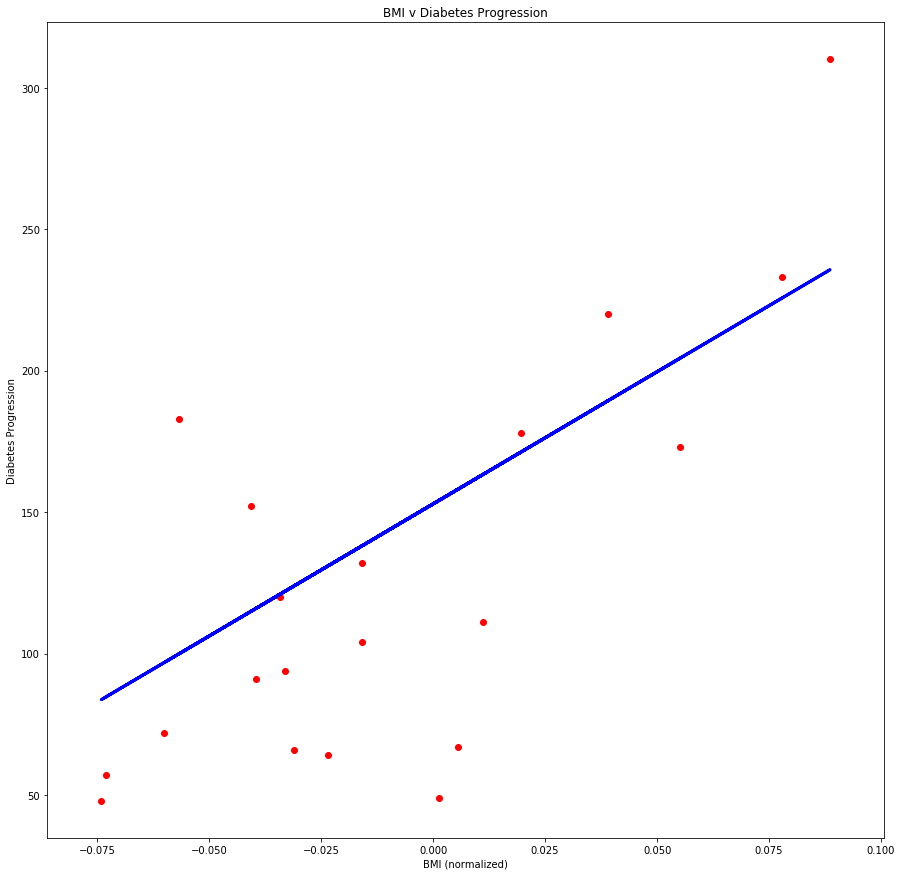

In [5]:
# Class to represent a linear regression model
class linear_regression:
    # Initializes the model with default values
    def __init__(self,training_input, training_output, learning_rate = 0.5, iterations = 10e5, threshold = 0.01):
        self.training_input = training_input
        self.training_output = training_output
        self.iterations = iterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.bias = 0.0
        self.weights = []
        self.weights += [1.0] * len(training_input[0])
        
    # Gets prediction based off of the current model
    def get_prediction(self, input_list):
        return self.bias + self.weights @ input_list
    
    # Given a set of inputs, it returns the predictions based off the model
    def get_predictions(self, inputs):
        return [self.get_prediction(elem) for elem in inputs]
    
    # Returns the change per weight
    def get_change_for_weight(self, weight_index):
        return np.array([(self.get_prediction(self.training_input[i]) - self.training_output[i]) * self.training_input[i][weight_index]
              for i in range(len(self.training_input))]).mean()
    
    # Returns the change for bias
    def get_change_for_bias(self):
        return np.array([(self.get_prediction(self.training_input[i]) - self.training_output[i])
              for i in range(len(self.training_input))]).mean()
    
    # Fits the model to the training data
    def fit(self):
        for i in range(int(self.iterations)):
            # Variable to keep track of number of weights/bias that go below the threshold
            below_threshold = 0
            
            # Find the value to the change the bias by and change it
            value = self.get_change_for_bias()
            if abs(value) < self.threshold:
                below_threshold += 1
            else:
                self.bias -= value * self.learning_rate
            
            # Find the changes for the weights and change them
            for j in range(len(self.weights)):
                value = self.get_change_for_weight(j)
                if abs(value) < self.threshold:
                    below_threshold += 1
                else:
                    self.weights[j] -= value * self.learning_rate
                    
            # Checks if all the weights and the bias are below the threshold. 
            # If so, the fitting process is complete
            if below_threshold == len(self.weights) + 1:
                break

# Creates the linear_regression object
lr = linear_regression(diabetes_X_train, diabetes_y_train)

# Fits the object to 
lr.fit()

# Gets the predictions for test data
diabetes_y_pred = lr.get_predictions(diabetes_X_test)

# Prints out bias, weight, mse, and variance (r2_score) for the test data predictions
print("BIAS: " + str(lr.bias))
print("WEIGHTS: " + str(lr.weights))
print("Mean Squared Error: " + str(mean_squared_error(diabetes_y_test, diabetes_y_pred)))
print('Variance score: ' + str(r2_score(diabetes_y_test,diabetes_y_pred)))

# Plots the data
plt.figure(figsize=(15,15))
plt.title("BMI v Diabetes Progression")
plt.xlabel("BMI (normalized)")
plt.ylabel("Diabetes Progression")
plt.scatter(diabetes_X_test, diabetes_y_test, color='red',label="Scatter points")
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3, label="Prediction line")

[2 Marks]
# b

### Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and validation. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

**Explanation:**

I split the data at a ratio fo 85:15 (training:test). I believe the 85:15 split will allow us enough of the sample to train the data while give us a large enough test subset to well establish the testing grounds. It is loosely based on the Pareto principle. Modified it from 80:20 to 85:15 when tested 80:20, 75:25, and 90:10. 85:15 gave the best r2 score. Although this is not a perfect indicator of a good split, I believe 808 out of 5,381 is a good enough test case subset to see if the results are skewed one way or another.

The data split is done at the end of part c.i because the data needed to preprocessed in order for the subsets to be relevant and throw out any garbage data.

In [8]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
meta_data = pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read

# To be used if ratings or keywords are desired
#ratings = pd.read_csv('ratings.csv')
#keywords = pd.read_csv('keywords.csv')

[5 Marks]
# c

### Organize the data into relevant features for predicting revenue. <br>
**i.  Explain your feature sets and organization.** <br>

The features used were the following:

    Budget
    Vote Count
    Ratings
    Popularity

Given that Budget is the strongest indicator closely followed by Vote Count (as seen by the heatmap), those two were added to ensure the best possible indication. Next up the Ratings and Popularity were added after iterations of trying all the features in meta_data. Furthermore, we added all the ratings from the rating file (joined by movieId and id) and all the keywords from the keywords.csv file (using One Hot Encoding method). All the features were considered, and only the features that contribute positively to the linear regression will be taken into account. And those were the ones I have listed above.

**ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings.** <br>

It seems to be the case that as long as the movies rating is about above 7.0, you are well on your way to make a lot of money (maximize revenue).

**iii. Visualize any other relationships you deem interesting and explain.** <br>

I have plotted the following plots:
    
    Heatmap of meta_data
    Heatmap of features
    Scatter plot of Budget vs Revenue
    Scatter plot of Vote Count vs Revenue
    Scatter plot of Popularity vs Revenue

The heatmaps explain a lot about the relationship of features. Thus I have heatmaps of both meta_data and my such that I can see it visually. Furthermore, I have plotted Budget, Vote Count, and Popularity. I can see that Budget and Vote Count have very good correlation to the revenue. We can also see that Popularity has low correlation to the revenue but it still helped.

Length of Movie Data - Test: 808
Length of Movie Data - Test - Target: 808
Length of Movie Data - Training: 4573
Length of Movie Data - Training - Target: 4573


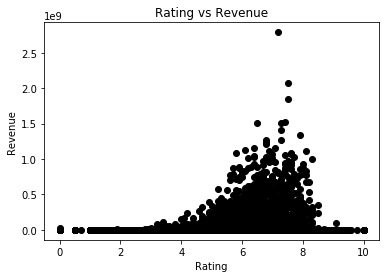

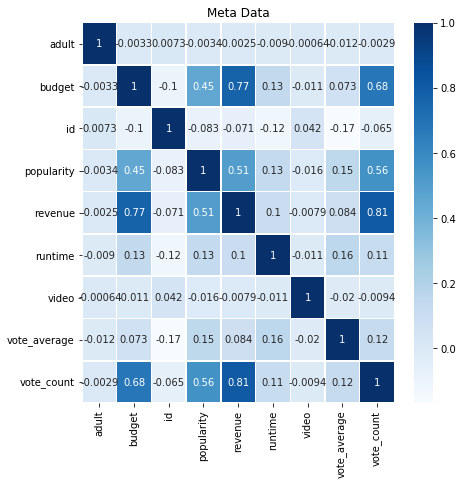

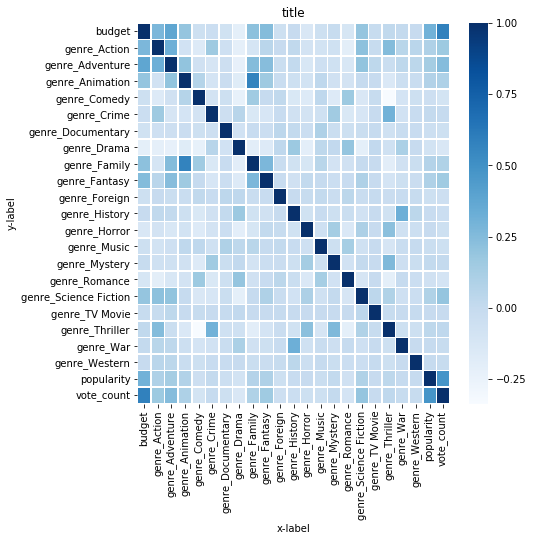

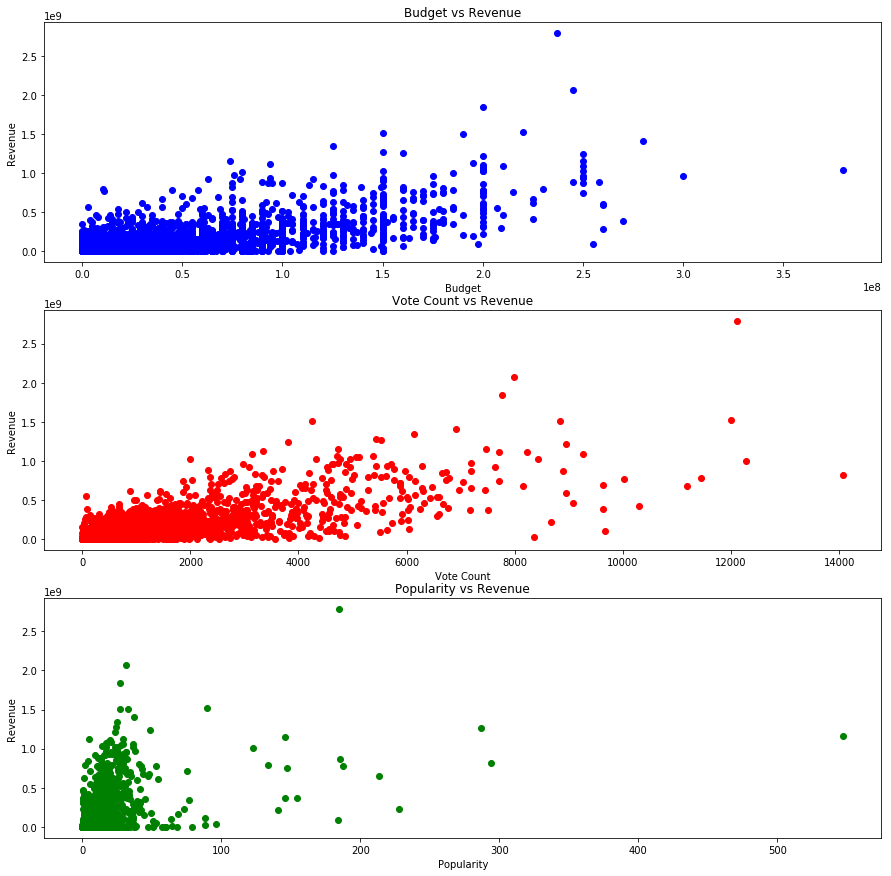

In [11]:
########################### FEATURE SETS ###########################

# Create a new DataFrame to store relevant features
features = pd.DataFrame()
features['id'] = meta_data['id']
features['revenue'] = meta_data['revenue']

# Months - No impact
#features['month'] = pd.to_datetime(meta_data['release_date'], errors='coerce').dt.month
#features['month'] = features['month'].dropna().astype(int)

# Rating (vote average) - No impact
#features['rating'] = meta_data['vote_average'].dropna().astype(float)

# Vote count
features['vote_count'] = meta_data['vote_count'].dropna().astype(int)

# Popularity
features['popularity'] = meta_data['popularity']
features = features.drop(features[features.popularity == 0].index)

# Genres - No/Bad Impact
genres = pd.DataFrame()
genres['id'] = meta_data['id']
genres['genres'] = pd.DataFrame(meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: ["genre_" + i['name'] for i in x] if isinstance(x, list) else []))
features = features.join(pd.DataFrame(mlb.fit_transform(genres['genres']),columns=mlb.classes_, index=genres.index))

# Original Languages - No/Bad Impact
#orig_lan = meta_data['original_language']
#features = features.join(pd.get_dummies(orig_lan, prefix="lang", columns=['original_language']))

# Keywords - Bad Impact (~ -0.60 in variance)
#keywords['keywords'] = keywords['keywords'].apply(literal_eval).apply(lambda x: ["keyword_" + i['name'] for i in x] if isinstance(x,list) else [])
#features = features.join(pd.DataFrame(mlb.fit_transform(keywords['keywords']), columns=mlb.classes_, index=keywords.index))

# Budget
features['budget'] = meta_data['budget']
features = features.drop(features[features.budget == 0].index)

# Runtime - No/Bad Impact
#features['runtime'] = meta_data['runtime']
#features = features.drop(features[features.runtime == 0].index)

# From ratings.csv: Ratings - Is not wanted for the model but will include in order to graph Ratings vs Revenue
#ratings_average = ratings.groupby('movieId', as_index=False).rating.mean()
#features = pd.merge(features, ratings_average, left_on='id', right_on='movieId', how='inner')

# Reorganize (sort) the features and take out ids
features = features.reindex_axis(sorted(features.columns), axis=1)
features = features.drop("id",axis=1)
features = features.dropna()

# Grabbed the ratings data from the ratings file to see any correlation. There was none
#plt.scatter(features['rating'].values, features['revenue'], color='black')
#features = features.drop("movieId",axis=1)

# Remove all rows with 0 as revenue values
features = features.drop(features[features.revenue == 0].index)

# Get the target (true) outputs
target = pd.DataFrame()
target['revenue'] = features['revenue']

# Split ratio value
split_ratio=0.85

# Split between the 
target_train = target[:math.floor(len(target)*split_ratio)]
target_test = target[math.floor(len(target)*split_ratio):]

# Remove the revenue from the dataset
features = features.drop("revenue",axis=1)

# Split the data into training data and test data
f_train = features[:math.floor(len(features)*split_ratio)]
f_test = features[math.floor(len(features)*split_ratio):]

# Print out all the lengths
print("Length of Movie Data - Test: " + str(len(f_test)))
print("Length of Movie Data - Test - Target: " + str(len(target_test)))
print("Length of Movie Data - Training: " + str(len(f_train)))
print("Length of Movie Data - Training - Target: " + str(len(target_train)))

########################### FEATURE SETS ###########################


########################### PLOTTING REVENUE VS RATING ###########################

# Plot scatter plot of rating and revenue as requested in ii
plt.title("Rating vs Revenue")
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.scatter(meta_data['vote_average'].values, meta_data['revenue'], color='black')

########################### PLOTTING REVENUE VS RATING ###########################



########################### PLOTTING OTHER RELATIONS ###########################

plt.figure(figsize=(7,7))
plt.title("Meta Data")
sns.heatmap(meta_data.corr(), annot=True, linewidths=.5,cmap="Blues")

plt.figure(figsize=(7,7))
plt.title("Features")
sns.heatmap(features.corr(), linewidths=.5,cmap="Blues")

plt.title("title")
plt.xlabel("x-label")
plt.ylabel("y-label")

plt.figure(figsize=(15,15))

plt.subplot(311)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.scatter(meta_data['budget'], meta_data['revenue'], color='blue')

plt.subplot(312)
plt.title("Vote Count vs Revenue")
plt.xlabel("Vote Count")
plt.ylabel("Revenue")
plt.scatter(meta_data['vote_count'], meta_data['revenue'], color='red')

plt.subplot(313)
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.scatter(meta_data['popularity'], meta_data['revenue'], color='green')
            
plt.show()

########################### PLOTTING OTHER RELATIONS ###########################

[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

Mean squared error (divided by 10e12): 1070.23
Variance score: 0.77


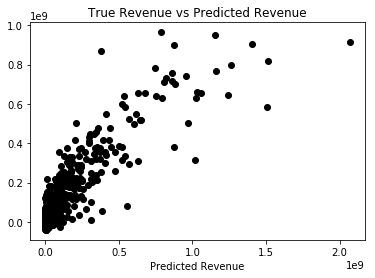

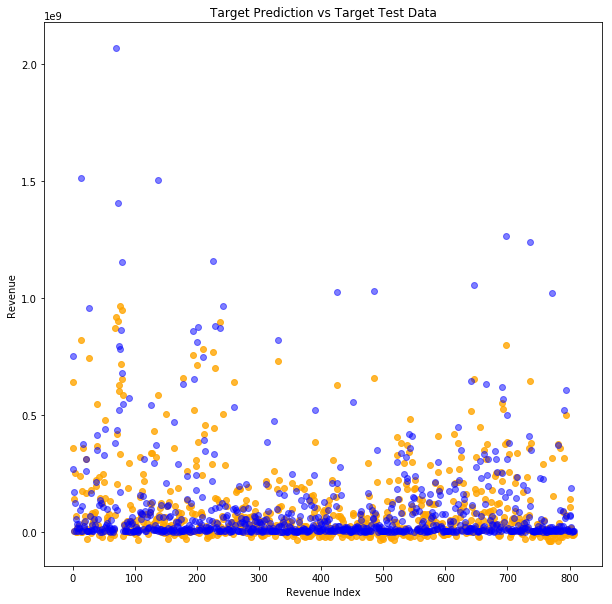

In [10]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(f_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(f_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error (divided by 10e12): %.2f" % (mean_squared_error(target_test, target_pred)/10e12))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

# Plot
plt.title("True Revenue vs Predicted Revenue")
plt.xlabel("True Revenue")
plt.xlabel("Predicted Revenue")
plt.scatter(target_test.revenue.values, target_pred, color='black')

# Plot
plt.figure(figsize=(10,10))
plt.scatter(range(len(target_pred)),target_pred, color='orange',alpha=0.8)
plt.scatter(range(len(target_pred)),target_test.revenue.values, color='blue',alpha=0.5)
plt.xlabel("Revenue Index")
plt.ylabel("Revenue")
plt.title("Target Prediction vs Target Test Data")
plt.show()

[4 Marks]
# e

**Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

I am using ridge because I believe the features that I have selected are fairly relevant to the result. Therefore by using ridge instead of lasso, I am able to preserve the impact of each feature.

Mean squared error (divided by 10e12): 4189.22
Variance score: 0.08


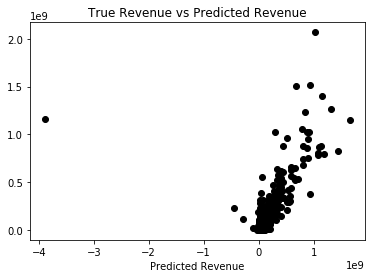

In [13]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression())])

# Train the model using the training sets
regr = regr.fit(f_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(f_test)

# The coefficients
#print('Coefficients: \n', regr.named_steps['linear'].coef_)

# The mean squared error
print("Mean squared error (divided by 10e12): %.2f" % (mean_squared_error(target_test, target_pred)/10e12))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

# Plot
plt.title("True Revenue vs Predicted Revenue")
plt.xlabel("True Revenue")
plt.xlabel("Predicted Revenue")
plt.scatter(target_pred, target_test.revenue.values,  color='black')

Mean squared error (divided by 10e12): 908.47
Variance score: 0.80


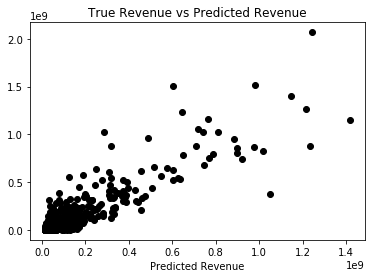

In [32]:
##### YOUR CODE HERE WITH REGULARIZATION #######
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression

# Create linear regression object
#regr = make_pipeline(PolynomialFeatures(3), LinearRegression())
regr = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('Ridge', Ridge(alpha=100000000000000000,normalize=False))])

# Train the model using the training sets
regr = regr.fit(f_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(f_test)

# The coefficients
#print('Coefficients: \n', regr.named_steps['ridge'].coef_)

# The mean squared error
print("Mean squared error (divided by 10e12): %.2f" % (mean_squared_error(target_test, target_pred)/10e12))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

# Plot
plt.title("True Revenue vs Predicted Revenue")
plt.xlabel("True Revenue")
plt.xlabel("Predicted Revenue")
plt.scatter(target_pred, target_test.revenue.values,  color='black')

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

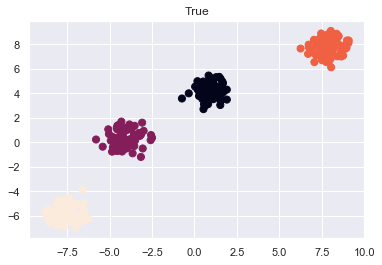

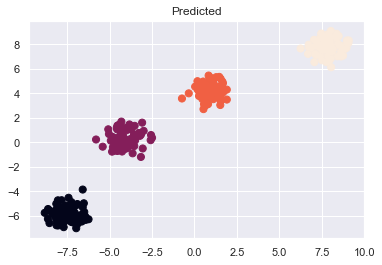

In [14]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

# import math
# import copy
# from random import *


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=3)


###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################

plt.figure(1)
plt.title("True")
plt.scatter(X[:, 0], X[:, 1] , s=50, c=y_true)

class k_means:
    def __init__(self, n = 8, max_iter = 300, rseed = 5):
        self.n = n
        self.n_iter = 0
        self.max_iter = max_iter
        self.cluster_centers = np.zeros([])
        self.y = np.zeros([])
        
    @staticmethod
    def euclidian_distance(vector1, vector2):
        return np.mean(np.sqrt(((vector2 - vector1)**2)))
    
    # Calculates the categories
    def calculate_y(self, arr):
        self.y = np.zeros(arr.shape[0])
        for i in range(arr.shape[0]):
            distances = np.array([self.euclidian_distance(arr[i],self.cluster_centers[j])
                                        for j in range(self.cluster_centers.shape[0])])
            index = np.argmin(distances)         
            self.y[i] = index
    
    # Create the cluster centers
    def generate_centers(self, arr):
        maxes = [arr[:,i].max() for i in range(arr.shape[1])] # max values of each dimension
        mins = [arr[:,i].min() for i in range(arr.shape[1])] # min values of each dimension
        
        # Generate the centers amongst the x = y points (Being used)
        dim = [maxes[i] - mins[i] for i in range(arr.shape[1])] # The length in each dimension
        self.cluster_centers = np.array([[(mins[j] + ((1.0+(2.0*i))/(2.0*self.n))*(dim[j])) 
                                         for j in range(arr.shape[1])]
                                         for i in range(self.n)])
  
        
        # Generate a sqrt(self.n) x sqrt(self.n) based coordinate system
        """
        dim = [maxes[i] - mins[i] for i in range(arr.shape[1])]
        dim_sqrt = int(np.sqrt(self.n)+1)
        self.cluster_centers = np.array([[
            (mins[0] + ((1 + (2*(i%dim_sqrt)))/(2*dim_sqrt))*dim[0]),
            (mins[1] + ((1 + (2*(i/dim_sqrt)))/(2*dim_sqrt))*dim[1])]
            for i in range(self.n)])""" or None
        
        # Generate random points
        """
        maxes = [arr[:,j].max() for j in ran ge(arr.shape[1])] # max values of each dimension
        mins = [arr[:,j].min() for j in range(arr.shape[1])] # min values of each dimension
        self.cluster_centers = np.array([[uniform(mins[j],maxes[j])
                                          for j in range(arr.shape[1])]
                                         for i in range(self.n)])""" or None
    
    # Recalculate the centroids
    def recalculate_centers(self, arr): 
        self.cluster_centers = np.array([[arr[np.where(self.y == i)][:,j].mean() 
                                                for j in range(arr.shape[1])]
                                                for i in range(self.n)])
                
    # Fit and return the y array
    def fit(self, arr):
        if arr.shape[0] == 0:
            return np.empty([])

        self.generate_centers(arr)
        self.calculate_y(arr)
        
        for i in range(self.max_iter):
            temp = np.copy(self.cluster_centers)
            self.recalculate_centers(arr)
            self.calculate_y(arr)
            if np.array_equal(temp, self.cluster_centers):
                self.n_iter = i
                break
        return self.y
    
    @staticmethod
    def print_clusters(arr, num):
        print(type(arr))
        for i in range(num):
            length = 0
            pile = str(i) + ": [ "
            for j in range(arr.shape[0]):
                if arr[j] == i:
                    length += 1
                    pile += str(j) + " "
            pile += "]"
            print(length)
            print(pile)
            print("\n\n")
            

mean = k_means(n=4)
y_pred = mean.fit(X)

plt.figure(2)
plt.title("Predicted")
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_pred);

# <a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [15]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')
print(mystery.shape)

kmeans = KMeans(n_clusters=8)
kmeans.fit(mystery)

(30309, 784)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

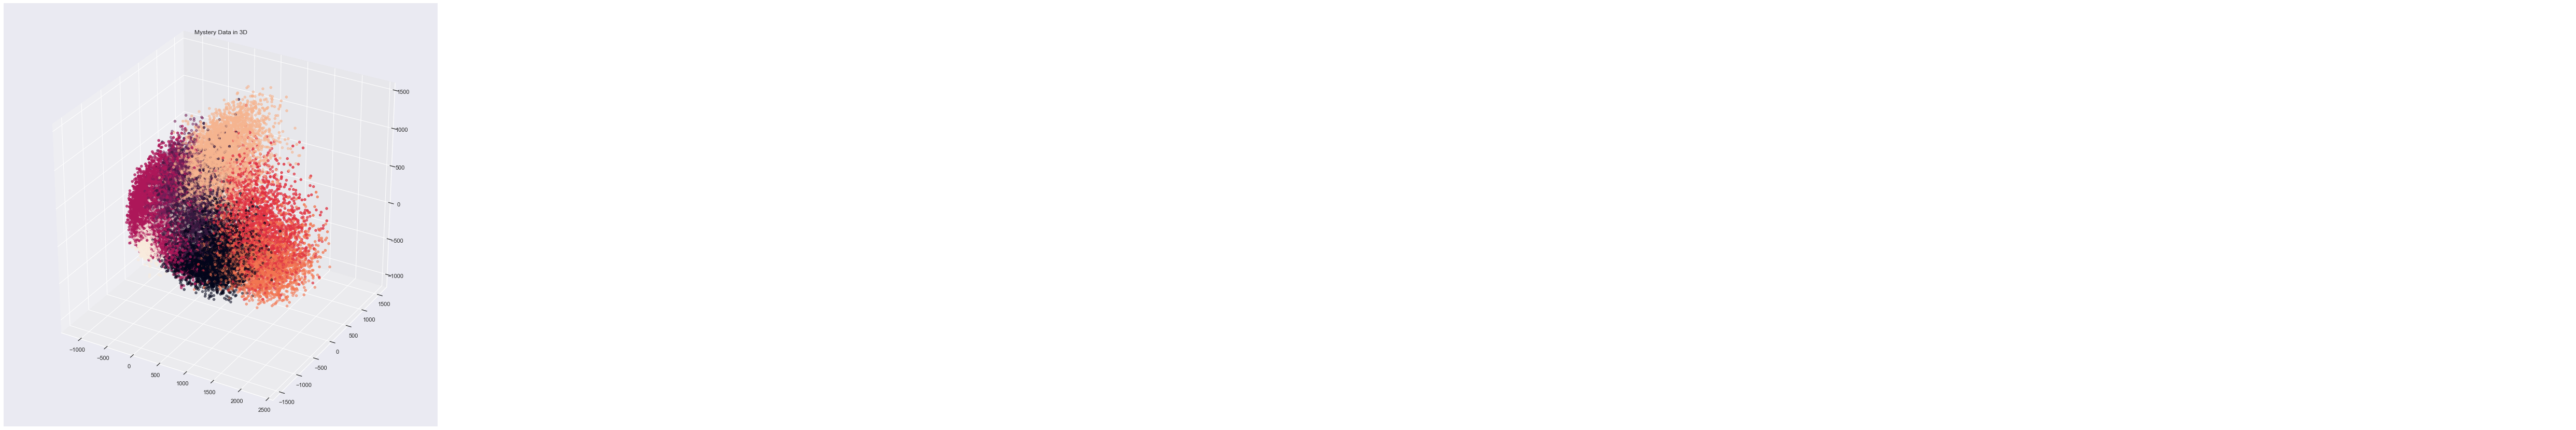

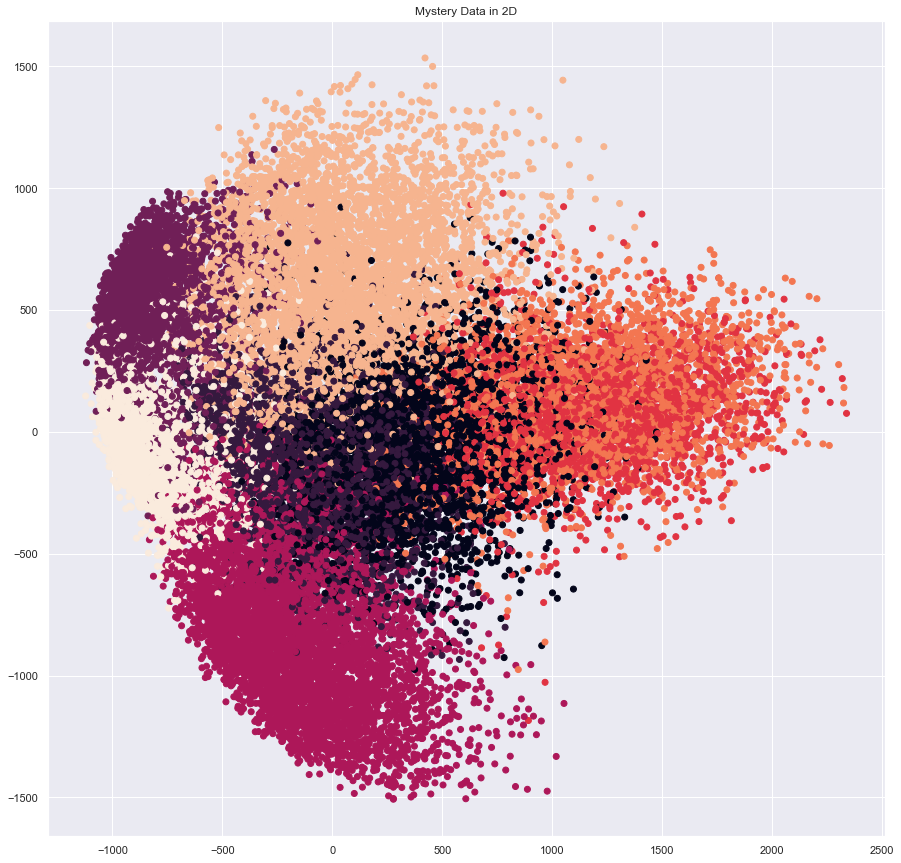

In [16]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
sk_pca = PCA(3)
sk_pca_data = sk_pca.fit_transform(mystery)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.title("Mystery Data in 3D")
ax.scatter(sk_pca_data[:,0], sk_pca_data[:,1], sk_pca_data[:,2], c=kmeans.labels_)

plt.show()

sk_pca = PCA(2)
sk_pca_data = sk_pca.fit_transform(mystery)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.title("Mystery Data in 2D")
ax.scatter(sk_pca_data[:,0], sk_pca_data[:,1], c=kmeans.labels_)

plt.show()

**Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.**

Visually I was able to see a seperation of four parts from the PCA reduced 2D plotting or 3D plotting of the data. Other cluster numbers also seemed reasonable so I decided I attempted at using other methods to make sense of the number of clusters. 

The inertia comparison method uses the inertia_ variable of the kmeans. This tells us how compact the points are in each cluster. The assumption here clusters are more compact are closer to being meaningful and representing the reality of the data better. This is not a perfect method but I thought to use it to potentially make more sense of the clustering. By seeing where the rate of change between the inertia values evens out, we can get a good approximation of the point where the clusters are tightly packed enough. 

For inertia comparison method here were my results:
*    n_cluster: inertia value | rate of change
*    2: 93552267021.12932 | N/A
*    3: 87388809674.24918 | 0.934117499
*    4: 82288184891.37509 | 0.941632976
*    5: 78648543323.62674 | 0.955769573
*    6: 75931487317.94658 | 0.965453194
*    7: 73592389903.92899 | 0.969194632
*    8: 71731253525.22931 | 0.974710206
*    9: 69996376208.94023 | 0.975814206
*    10: 68492431108.35821 | 0.978513958
*    11: 67369748052.855415 | 0.983608655
*    12: 66280162263.25538 | 0.98382678
*    13: 65390025502.04199 | 0.986570088
*    14: 64331356776.15597 | 0.983809936
*    15: 63573661205.59978 | 0.988221987
*    16: 62794582501.36804 | 0.98774526
*    17: 62198907500.095665 | 0.990513911
*    18: 61592749795.9662 | 0.990254528
*    19: 61014980261.32515 | 0.99061952

By looking at the rate of change between the inertia values, we can see the changes remain relatively significant until 8. From there on the rate of change drops significantly. So from this method, n_cluster = 8 may potentially be a good representation of the data.

Silhouette analysis gives us how close the data points are in the cluster in comparison to the data points to the other clusters. This method may have been able to give us a good prediction of the number of clusters but it was computationally too extensive to actually account for it in this assignment.

I used the elbow method to graph the total intra-cluster variation which is very similar to the what I did with inertia comparison. Even on that graph we can see 8 is the best place (elbow). 

<img src="elbow_graph.png" title="Elbow" />

Therefore, I believe 8 is probably the best number of clusters.


**(any additional code supporting your assertion on the number of clusters may be included below)

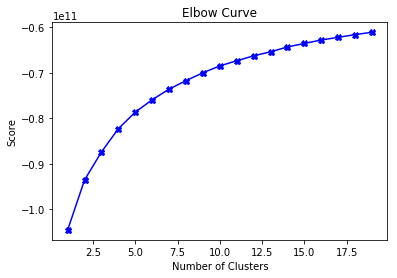

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Inertia Comparison
for i in range(2,20):
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(mystery)
    print("For n_cluster = ", i, "The inertia is: ", clusterer.inertia_)

# Silhouette Method
for i in range(2,6):
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(mystery)
    silhouette_avg = silhouette_score(mystery, cluster_labels)
    print("For n_clusters = ", i, "The average silhouette_score is :", silhouette_avg)

# Elbow method
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(mystery).score(mystery) for i in range(len(kmeans))]

plt.plot(Nc,score, 'bX-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [28]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [29]:
##### YOUR CODE HERE #######
